In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle
import seaborn as sns

: 

In [ ]:
!conda update --all




In [4]:
df = pd.read_csv(r'C:\Users\aakkim\Weather-Forecasting-ML-algorithms\PhxWeather2.csv')

In [5]:
df

,STATION,NAME,DATE,ACMC,ACSC,AWND,PRCP,SNOW,TAVG,TMAX,...,WT10,WT11,WT13,WT14,WT16,WT18,WT21,WV03,WV07,WV20
0,USW00023183,"PHOENIX AIRPORT, AZ US",1/1/1950,NaN,NaN,NaN,0.0,0.0,62.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023183,"PHOENIX AIRPORT, AZ US",1/2/1950,NaN,NaN,NaN,0.0,0.0,60.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00023183,"PHOENIX AIRPORT, AZ US",1/3/1950,NaN,NaN,NaN,0.0,0.0,40.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023183,"PHOENIX AIRPORT, AZ US",1/4/1950,NaN,NaN,NaN,0.0,0.0,33.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023183,"PHOENIX AIRPORT, AZ US",1/5/1950,NaN,NaN,NaN,0.0,0.0,34.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27075,USW00023183,"PHOENIX AIRPORT, AZ US",2/17/2024,NaN,NaN,5.37,0.0,0.0,62.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27076,USW00023183,"PHOENIX AIRPORT, AZ US",2/18/2024,NaN,NaN,4.70,0.0,0.0,63.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27077,USW00023183,"PHOENIX AIRPORT, AZ US",2/19/2024,NaN,NaN,5.82,0.0,0.0,65.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27078,USW00023183,"PHOENIX AIRPORT, AZ US",2/20/2024,NaN,NaN,NaN,0.0,0.0,67.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
corr_matrix = df.iloc[:,5:12].corr()
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm')
plt.show()

ModuleNotFoundError: No module named 'matplotlib_inline'

In [40]:
phx = df
phx['Date'] = pd.to_datetime(df['DATE'])
phx.dtypes

STATION            object
NAME               object
DATE               object
PRCP              float64
SNOW              float64
SNWD              float64
TAVG              float64
TMAX                int64
TMIN              float64
Date       datetime64[ns]
dtype: object

In [41]:
phx = phx.drop('DATE', axis = 1)

In [42]:
phx

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Date
0,USW00023183,"PHOENIX AIRPORT, AZ US",0.00,0.0,0.0,62.0,70,54.0,1950-01-01
1,USW00023183,"PHOENIX AIRPORT, AZ US",0.00,0.0,0.0,60.0,66,54.0,1950-01-02
2,USW00023183,"PHOENIX AIRPORT, AZ US",0.00,0.0,0.0,40.0,55,25.0,1950-01-03
3,USW00023183,"PHOENIX AIRPORT, AZ US",0.00,0.0,0.0,33.0,47,19.0,1950-01-04
4,USW00023183,"PHOENIX AIRPORT, AZ US",0.00,0.0,0.0,34.0,51,17.0,1950-01-05
...,...,...,...,...,...,...,...,...,...
27065,USW00023183,"PHOENIX AIRPORT, AZ US",0.12,0.0,0.0,54.0,62,49.0,2024-02-07
27066,USW00023183,"PHOENIX AIRPORT, AZ US",0.22,0.0,0.0,52.0,58,43.0,2024-02-08
27067,USW00023183,"PHOENIX AIRPORT, AZ US",0.00,0.0,0.0,47.0,60,40.0,2024-02-09
27068,USW00023183,"PHOENIX AIRPORT, AZ US",0.17,0.0,0.0,51.0,59,45.0,2024-02-10


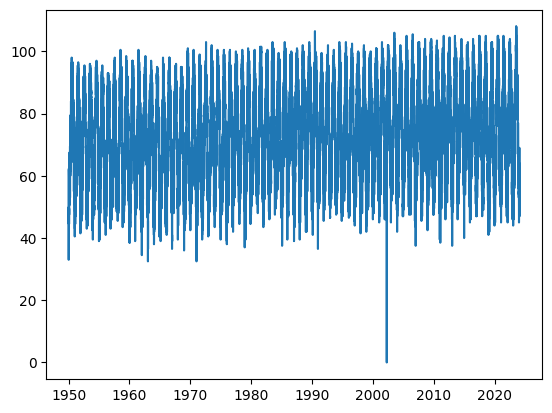

In [43]:
plt.plot(phx['Date'], phx['TAVG'])
plt.show()

In [47]:
data = phx[['Date', 'TAVG']]
data.columns = ['ds', 'y']

In [48]:
data

,ds,y
0,1950-01-01,62.0
1,1950-01-02,60.0
2,1950-01-03,40.0
3,1950-01-04,33.0
4,1950-01-05,34.0
...,...,...
27065,2024-02-07,54.0
27066,2024-02-08,52.0
27067,2024-02-09,47.0
27068,2024-02-10,51.0


In [49]:
m = NeuralProphet()
m.fit(data, freq = 'D', epochs = 1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (212) is too small than the required number                     for the learning rate finder (260). The results might not be optimal.
Missing logger folder: C:\Users\aakkim\lightning_logs


Finding best initial lr:   0%|          | 0/260 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,53.698650,65.290512,0.331106,0.0,0
1,15.115225,18.837080,0.038484,0.0,1
2,7.535079,9.862154,0.010929,0.0,2
3,5.600520,7.244993,0.006335,0.0,3
4,5.061951,6.472132,0.005235,0.0,4
...,...,...,...,...,...
995,4.294596,5.401551,0.003911,0.0,995
996,4.293857,5.402007,0.003911,0.0,996
997,4.291404,5.396613,0.003907,0.0,997
998,4.296403,5.402028,0.003913,0.0,998


In [50]:
future = m.make_future_dataframe(data, periods = 900)
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 212it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [56]:
plot1 = m.plot(forecast)
plot1

WARNING - (py.warnings._showwarnmsg) - C:\Users\aakkim\Anaconda3\lib\site-packages\neuralprophet\plot_forecast_plotly.py:94: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '7f573ba8-c82c-437e-bf97-f86f490afd9e',
              'x': array([datetime.datetime(2024, 2, 12, 0, 0),
                          datetime.datetime(2024, 2, 13, 0, 0),
                          datetime.datetime(2024, 2, 14, 0, 0), ...,
                          datetime.datetime(2026, 7, 28, 0, 0),
                          datetime.datetime(2026, 7, 29, 0, 0),
                          datetime.datetime(2026, 7, 30, 0, 0)], dtype=object),
              'y': array([60.65826 , 60.779324, 60.722607, ..., 96.56316 , 96.292145, 96.33067 ],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid':

In [58]:
plt2 = m.plot_components(forecast)
plt2

WARNING - (py.warnings._showwarnmsg) - C:\Users\aakkim\Anaconda3\lib\site-packages\neuralprophet\plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - C:\Users\aakkim\Anaconda3\lib\site-packages\neuralprophet\plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - C:\Users\aakkim\Anaconda3\lib\site-packages\neuralprophet\plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containi

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'a7c5b4d9-200a-4231-b22a-1e07f5d95341',
              'x': array([datetime.datetime(2024, 2, 12, 0, 0),
                          datetime.datetime(2024, 2, 13, 0, 0),
                          datetime.datetime(2024, 2, 14, 0, 0), ...,
                          datetime.datetime(2026, 7, 28, 0, 0),
                          datetime.datetime(2026, 7, 29, 0, 0),
                          datetime.datetime(2026, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([76.56105 , 76.561134, 76.56121 , ..., 76.63446 , 76.634544, 76.63462 ],
                         dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality

In [63]:
with open('saved_model.pk1', "wb") as f:
    m = pickle.dump(m,f)

In [ ]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)
future = m.make_future_dataframe(data, periods = 900)
forecast = m.predict(future)